# Introduction to Regression with Neural Networks in Tensor Flow

There are many definitions for a regression problem but in our case, we're going to cimplify it: predicting a numerical veriable based on a same other combination of veriables, even shorter... predicting number

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.14.0


## Creating data to view and fit

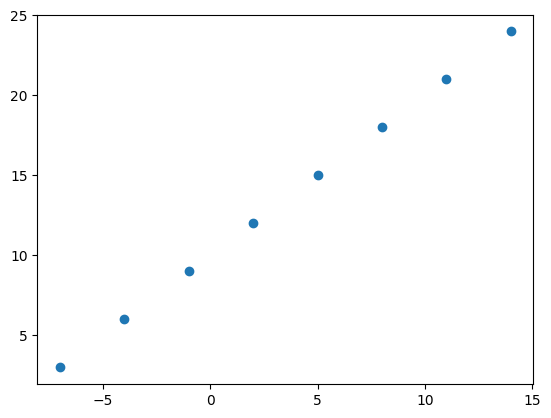

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it

plt.scatter(X,y)

In [ ]:
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape,output_shape

((8,), (8,))

In [ ]:
# Turn  our NumPy to tensors
X= tf.cast(tf.constant(X),dtype=tf.float32)
y= tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
X[0].shape

TensorShape([])

## Steps in modeling with TS

1. Creating a model - define the input and outputs layers
2. Compiling models - define the loss fucntion(in other words , the function which tells our model how wrong is it)
3.Fitting a model - letting the model try to find patterns bettwen X & y

In [ ]:
# Set random seed

tf.random.set_seed(42)

# Create a model useng Sequantial API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae, # mean absolute error
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 865ms/step - loss: 9.4928 - mae: 9.4928
Epoch 2/5
1/1 [==============================] - 0s 24ms/step - loss: 9.3603 - mae: 9.3603
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 9.2278 - mae: 9.2278
Epoch 4/5
1/1 [==============================] - 0s 25ms/step - loss: 9.0953 - mae: 9.0953
Epoch 5/5
1/1 [==============================] - 0s 28ms/step - loss: 8.9628 - mae: 8.9628


In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([-1.0])
y_pred

1/1 [==============================] - 0s 322ms/step


array([[-1.2699103]], dtype=float32)

In [ ]:
y_pred + 20

array([[18.73009]], dtype=float32)

# Improving model

We can improve our model by  altering the steps we took  to create a model

1. Creating model - here we might add more layers, we might change the activation function
2. Compiling a model - here we might change the optimization function or perhaps the learing rate of the optimiaztion function.
3. Fitting a model - here we might fit a model for more **epochs** leave it traning for longer

In [ ]:

 # Crate a model
 model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
 ])

#Compiling a model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
#Fit model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 938ms/step - loss: 18.1004 - mae: 18.1004
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 17.8191 - mae: 17.8191
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 17.5379 - mae: 17.5379
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 17.2566 - mae: 17.2566
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 16.9754 - mae: 16.9754
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 16.6941 - mae: 16.6941
Epoch 7/100
1/1 [==============================] - 0s 46ms/step - loss: 16.4129 - mae: 16.4129
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 16.1316 - mae: 16.1316
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 15.8504 - mae: 15.8504
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 15.5691 - mae: 15.5691
Epoch 11/100
1/1 [==============================

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 116ms/step


array([[29.387415]], dtype=float32)

In [ ]:
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1, )
])
#Compiling model
model.compile(loss= tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics=["mae"])

#Fitting the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 14.0770 - mae: 14.0770
Epoch 2/100
1/1 [==============================] - 0s 25ms/step - loss: 14.0045 - mae: 14.0045
Epoch 3/100
1/1 [==============================] - 0s 37ms/step - loss: 13.9320 - mae: 13.9320
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 13.8595 - mae: 13.8595
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 13.7869 - mae: 13.7869
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 13.7143 - mae: 13.7143
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 13.6417 - mae: 13.6417
Epoch 8/100
1/1 [==============================] - 0s 27ms/step - loss: 13.5690 - mae: 13.5690
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 13.4963 - mae: 13.4963
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 13.4235 - mae: 13.4235
Epoch 11/100
1/1 [==============================] -

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 403ms/step


array([[31.085224]], dtype=float32)

## Evaluting a model

In [ ]:
X = tf.range(-100,100,4 )
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for data set
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

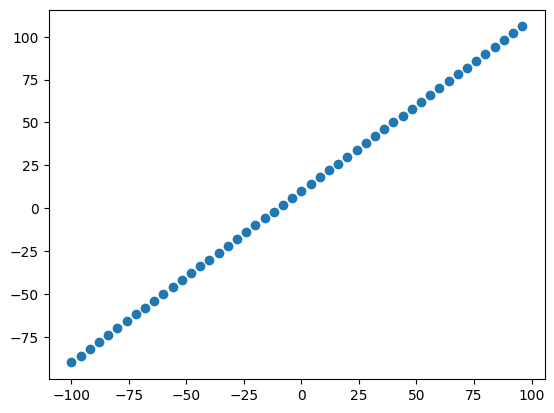

In [ ]:
# Visualize a date
import matplotlib.pyplot as plt

plt.scatter(X,y)

### The 3 sets

* Traning set - the model learns from this(70-80% of the total data)
* Validation set - the model gets tuned on this data(10-15% of the data)
* Test set - the model evaulated on this data to test what is has learned(10-15% of the data)

In [ ]:
# Check the length of samples

len(X)

50

In [ ]:
# SPlit the data into train and test sets
X_train =  X[:40] #first 40
y_train = y[:40]
X_test = X[40:] #last 10
y_test = y[40:]

X_train,y_train,X_test,y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

### Visualing the data

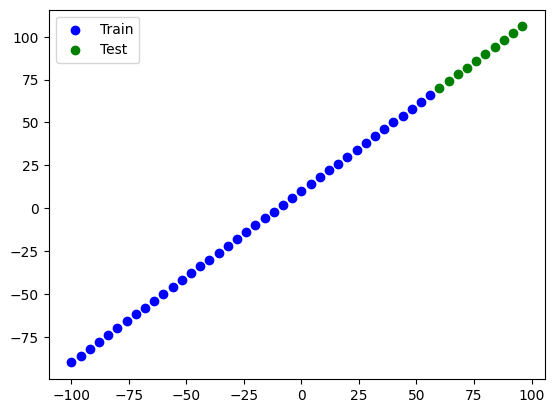

In [ ]:
# plt.figure(figsize=(10,7)) # size of plot
plt.scatter(X_train,y_train,c="b", label="Train")
plt.scatter(X_test,y_test,c="g",label="Test")
plt.legend(); # shows the label

In [ ]:
# Let's have a look how to built neural network to our data

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)

])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# model.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=100)

### Visualising the model

In [ ]:
# let's create a model wich defines automatically

tf.random.set_seed(42)

# previos * current + current
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(100,),
    tf.keras.layers.Dense(100,),
    tf.keras.layers.Dense(100,),

], name="one_of_models")

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics=["mae"]
)
model.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=100,verbose=0)
# model.summary()

* Total params - total number of parameters inthe models
* Trainble parametrs - these are parametrs the model can update as it trains
* Non-trainble params = this params aren't updated

In [ ]:
y_pred = model.predict(X_test)
X_test,y_test,y_pred[:,31]

1/1 [==============================] - 0s 111ms/step


(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([ 66.7952 ,  70.64305,  74.49089,  78.33875,  82.18659,  86.03443,
         89.8823 ,  93.73014,  97.57801, 101.42582], dtype=float32))

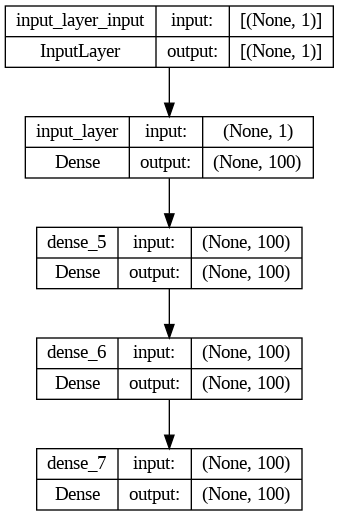

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True)

In [ ]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    pred = y_pred):

  plt.scatter(train_data,train_labels,c="b",label="training")
  plt.scatter(test_data,test_labels,c="g",label="testing")
  plt.scatter(test_data, pred,c="r",label="predictions")
  plt.legend()

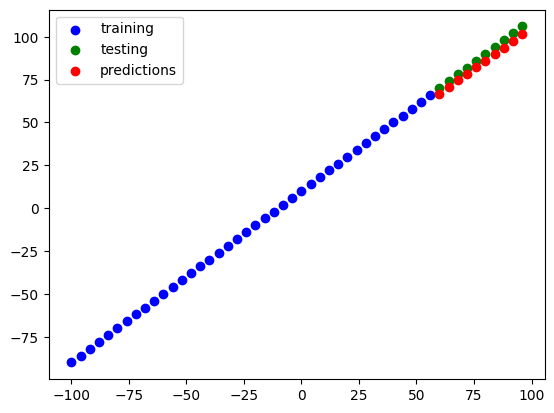

In [ ]:
plot_prediction(pred=y_pred[:,31])

### Evaluating our model's

In [ ]:
model.evaluate(X_train,y_train)

2/2 [==============================] - 0s 8ms/step - loss: 1.7898 - mae: 1.7898


[1.789849042892456, 1.789849042892456]

In [ ]:
#Calculate MAE
mae=tf.metrics.MAE(y_test,tf.constant(y_pred[:,31]))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.8894813>

In [ ]:
#Calculate MSE
mse=tf.metrics.MSE(y_test,tf.constant(y_pred[:,31]))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=15.319052>

### Running experiments to improve our models

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_1.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 32ms/step - loss: 28.9302 - mae: 28.9302
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 9.1496 - mae: 9.1496
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 7.9857 - mae: 7.9857
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 7.9898 - mae: 7.9898
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 10.1603 - mae: 10.1603
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.4227 - mae: 9.4227
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 8.5631 - mae: 8.5631
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.0368 - mae: 9.0368
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 18.7467 - mae: 18.7467
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 10.1064 - mae: 10.1064
Epoch 11/100
2/2 [==============================] - 0s 12ms/st

1/1 [==============================] - 0s 56ms/step


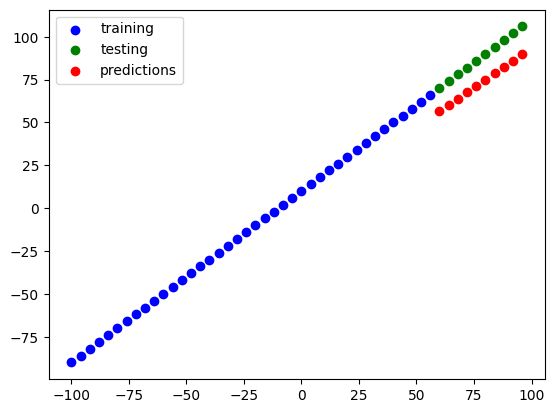

In [ ]:
# Make and plot
y_preds_1 = model_1.predict(X_test)
plot_prediction(pred=y_preds_1)

In [ ]:
mae_1 = tf.metrics.MAE(y_test, tf.squeeze(y_preds_1))
mse_1 = tf.metrics.MSE(y_test, tf.squeeze(y_preds_1))

mae_1

<tf.Tensor: shape=(), dtype=float32, numpy=14.823911>

In [ ]:
tf.random.set_seed(42)
X2 = tf.range(-100,100,4 )
y2 = 2 * tf.abs(X2) + 10
X_train2 =  X2[:40] #first 40
y_train2 = y2[:40]
X_test2 = X2[40:] #last 10
y_test2 = y2[40:]

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
        tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1),
])

model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics=['mse']
)

model_3.fit(tf.expand_dims(X_train2,axis=-1),y_train2,epochs=1000)


Epoch 1/1000
2/2 [==============================] - 2s 17ms/step - loss: 90.2551 - mse: 10921.0020
Epoch 2/1000
2/2 [==============================] - 0s 13ms/step - loss: 90.0044 - mse: 10862.4209
Epoch 3/1000
2/2 [==============================] - 0s 13ms/step - loss: 89.7555 - mse: 10804.7598
Epoch 4/1000
2/2 [==============================] - 0s 10ms/step - loss: 89.5108 - mse: 10748.5596
Epoch 5/1000
2/2 [==============================] - 0s 10ms/step - loss: 89.2959 - mse: 10701.3936
Epoch 6/1000
2/2 [==============================] - 0s 11ms/step - loss: 89.0849 - mse: 10653.9355
Epoch 7/1000
2/2 [==============================] - 0s 9ms/step - loss: 88.8611 - mse: 10603.7920
Epoch 8/1000
2/2 [==============================] - 0s 9ms/step - loss: 88.6296 - mse: 10550.7061
Epoch 9/1000
2/2 [==============================] - 0s 8ms/step - loss: 88.3975 - mse: 10501.8193
Epoch 10/1000
2/2 [==============================] - 0s 8ms/step - loss: 88.1692 - mse: 10451.6455
Epoch 11/1000

1/1 [==============================] - 0s 70ms/step


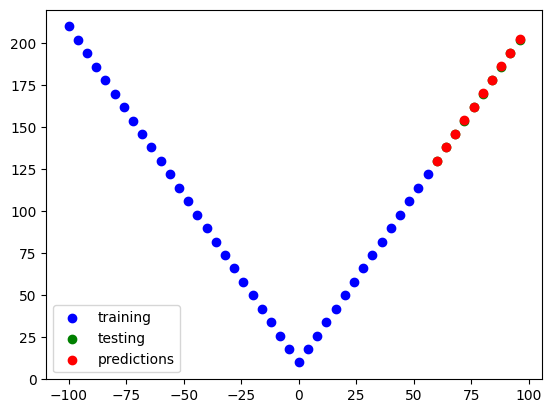

In [ ]:
y_preds_3 = model_3.predict(X_test2)
train_data = X_train2
train_labels = y_train2
test_data = X_test2
test_labels = y_test2
pred = y_preds_3
plt.scatter(train_data,train_labels,c="b",label="training")
plt.scatter(test_data,test_labels,c="g",label="testing")
plt.scatter(test_data, pred,c="r",label="predictions")
plt.legend()

In [ ]:
model_3.predict([10])

1/1 [==============================] - 0s 110ms/step


array([[29.998907]], dtype=float32)

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1),
])

model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics=['mse']
)

model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=1000)


Epoch 1/1000
2/2 [==============================] - 1s 20ms/step - loss: 54.2255 - mse: 4036.1558
Epoch 2/1000
2/2 [==============================] - 0s 40ms/step - loss: 53.6046 - mse: 3944.3540
Epoch 3/1000
2/2 [==============================] - 0s 11ms/step - loss: 53.0046 - mse: 3855.3267
Epoch 4/1000
2/2 [==============================] - 0s 10ms/step - loss: 52.3948 - mse: 3766.1558
Epoch 5/1000
2/2 [==============================] - 0s 14ms/step - loss: 51.7962 - mse: 3681.1987
Epoch 6/1000
2/2 [==============================] - 0s 23ms/step - loss: 51.1962 - mse: 3594.7612
Epoch 7/1000
2/2 [==============================] - 0s 22ms/step - loss: 50.5931 - mse: 3507.9673
Epoch 8/1000
2/2 [==============================] - 0s 22ms/step - loss: 49.9702 - mse: 3416.9492
Epoch 9/1000
2/2 [==============================] - 0s 23ms/step - loss: 49.3869 - mse: 3339.1138
Epoch 10/1000
2/2 [==============================] - 0s 27ms/step - loss: 48.8033 - mse: 3258.8921
Epoch 11/1000
2/2 [

1/1 [==============================] - 0s 51ms/step


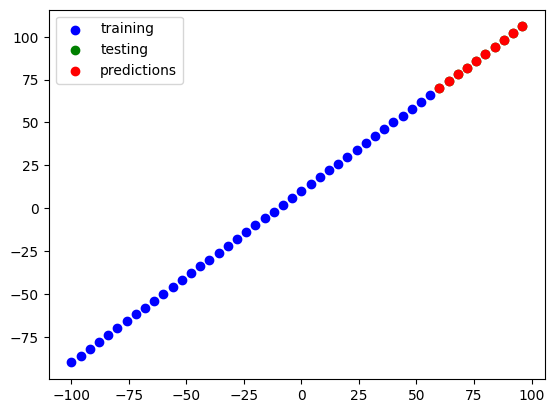

In [ ]:
y_preds_2 = model_2.predict(X_test)
plot_prediction(pred=y_preds_2)

In [ ]:
mae_2 = tf.metrics.MAE(y_test, tf.squeeze(y_preds_2))
mse_2 = tf.metrics.MSE(y_test, tf.squeeze(y_preds_2))
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0044258116>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.1648646e-05>)

In [ ]:
model_2.predict([0])

1/1 [==============================] - 0s 76ms/step


array([[10.005323]], dtype=float32)

In [ ]:
import pandas as pd

model_result=[[
    "model_1",mae_1.numpy(),mse_1.numpy()
],[
    "model_2",mae_2.numpy(),mse_2.numpy()
]]
all_results = pd.DataFrame(model_result, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,14.823911,220.563644
1,model_2,0.004426,0.000022


from matplotlib import pyplot as plt
all_results['mae'].plot(kind='hist', bins=20, title='mae')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_results['mse'].plot(kind='hist', bins=20, title='mse')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
all_results.groupby('model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_results.plot(kind='scatter', x='mae', y='mse', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_results['mae'].plot(kind='line', figsize=(8, 4), title='mae')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
all_results['mse'].plot(kind='line', figsize=(8, 4), title='mse')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(all_results['model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(all_results, x='mae', y='model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(all_results['model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(all_results, x='mse', y='model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Tools to tracks result of experiments

* TesorBoard = a component of the TensorFLow library t help track modelling experiments.
* Weights & Biases - a tool for tracking all of kinds of maschine learning experiments


## Saving models

Sving our models allows us to use it in our application

1. SavedModel format
2. HDF5 format

In [ ]:
model_2.save("model_2")
model_3.save("model_3")

In [ ]:
model_2.save("model_2_HDF5.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading saved models

In [ ]:
saved_model_3 = tf.keras.models.load_model("/content/model_3")
saved_model_3.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 10)                20        
                                                                 
 dense_67 (Dense)            (None, 10)                110       
                                                                 
 dense_68 (Dense)            (None, 10)                110       
                                                                 
 dense_69 (Dense)            (None, 1)                 11        
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# COmpare model_3 predictions with SavedModel
model_3_preds = model_3.predict(X_test2)
model_3_preds_saved = saved_model_3.predict(X_test2)
model_3_preds == model_3_preds_saved

1/1 [==============================] - 0s 431ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
saved_h5_model = tf.keras.models.load_model("/content/model_2_HDF5.h5")
saved_h5_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Donwload the file from Google Colab
from google.colab import files
files.download("/content/model_2_HDF5.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Copy to Google Drive
!cp /content/model_2_HDF5.h5 /content/drive/MyDrive

## A larger Expample

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [ ]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(
    loss = tf.keras.losses.mae,
  optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=["mae"]
)
history = insurance_model.fit(X_train,y_train, epochs=1000)

Epoch 1/1000
34/34 [==============================] - 3s 4ms/step - loss: 12776.2617 - mae: 12776.2617
Epoch 2/1000
34/34 [==============================] - 0s 4ms/step - loss: 7740.6655 - mae: 7740.6655
Epoch 3/1000
34/34 [==============================] - 0s 6ms/step - loss: 7251.6279 - mae: 7251.6279
Epoch 4/1000
34/34 [==============================] - 0s 6ms/step - loss: 7042.6802 - mae: 7042.6802
Epoch 5/1000
34/34 [==============================] - 0s 6ms/step - loss: 6892.3413 - mae: 6892.3413
Epoch 6/1000
34/34 [==============================] - 0s 6ms/step - loss: 6686.7256 - mae: 6686.7256
Epoch 7/1000
34/34 [==============================] - 0s 7ms/step - loss: 6629.2979 - mae: 6629.2979
Epoch 8/1000
34/34 [==============================] - 0s 6ms/step - loss: 6571.5654 - mae: 6571.5654
Epoch 9/1000
34/34 [==============================] - 0s 6ms/step - loss: 6496.6255 - mae: 6496.6255
Epoch 10/1000
34/34 [==============================] - 0s 8ms/step - loss: 6445.1357 - ma

In [ ]:
# Check results on test data

insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 1327.1072 - mae: 1327.1072


[1327.107177734375, 1327.107177734375]

Text(0.5, 0, 'epochs')

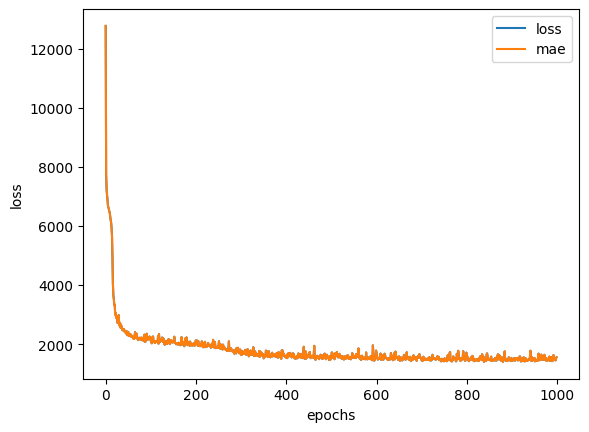

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X.shape

(1338, 11)

In [ ]:
insurance_model.predict([[16,23.5,0,0,1,1,0,0,0,0,1]])

1/1 [==============================] - 0s 258ms/step


array([[959.6618]], dtype=float32)

## Preprocessing data

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
    )

X = insurance.drop("charges",axis=1)
y = insurance["charges"]

X_train, X_test, y_train, Y_test = train_test_split(X ,y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)





In [ ]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(
   loss= tf.keras.losses.mae,
    optimizer =tf.keras.optimizers.Adam(lr=0.01),
    metrics=["mae"]
)

insurance_model_2.fit(X_train_normal, y_train, epochs=1000)

Epoch 1/1000
34/34 [==============================] - 8s 6ms/step - loss: 13341.8662 - mae: 13341.8662
Epoch 2/1000
34/34 [==============================] - 0s 6ms/step - loss: 11581.1113 - mae: 11581.1113
Epoch 3/1000
34/34 [==============================] - 0s 6ms/step - loss: 7757.5229 - mae: 7757.5229
Epoch 4/1000
34/34 [==============================] - 0s 7ms/step - loss: 6210.8325 - mae: 6210.8325
Epoch 5/1000
34/34 [==============================] - 0s 6ms/step - loss: 4782.1143 - mae: 4782.1143
Epoch 6/1000
34/34 [==============================] - 0s 6ms/step - loss: 3874.3354 - mae: 3874.3354
Epoch 7/1000
34/34 [==============================] - 0s 6ms/step - loss: 3381.4888 - mae: 3381.4888
Epoch 8/1000
34/34 [==============================] - 0s 7ms/step - loss: 3363.8340 - mae: 3363.8340
Epoch 9/1000
34/34 [==============================] - 0s 7ms/step - loss: 3191.1248 - mae: 3191.1248
Epoch 10/1000
34/34 [==============================] - 0s 7ms/step - loss: 3232.2715 - 

In [ ]:
insurance_model_2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1317.7670 - mae: 1317.7670


[1317.7669677734375, 1317.7669677734375]

In [ ]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal.shape

(1070, 11)

<Axes: ylabel='Frequency'>

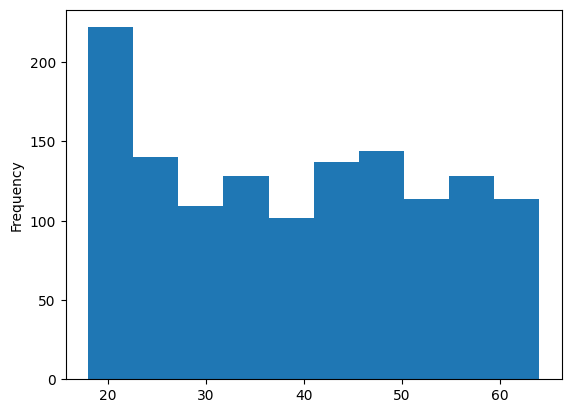

In [ ]:
X["age"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64